# División de Dataset en Conjuntos de Entrenamiento, Validación y Prueba

In [1]:
import os
import shutil
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torchvision.datasets import ImageFolder
from torch.utils.data import Subset
from PIL import Image

#### Definir la rutas

In [2]:
dataset = '../data/processed/preprocessed_potato_leaf'
categories1 = os.listdir(dataset )

#### Función para cargar y mostrar  imágenes de cada categoría 

In [3]:

def show_sample_images_pil(data_dir, categories, num_samples=5):
    for category in categories:
        # Obtener la ruta completa de la carpeta de la categoría
        category_path = os.path.join(data_dir, category)
        images = os.listdir(category_path)[:num_samples]  

        print(f"Mostrando imágenes de la categoría: {category}")
        
        # Mostrar las imágenes
        fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
        for i, img_file in enumerate(images):
            img_path = os.path.join(category_path, img_file)

            try:
                img = Image.open(img_path)  # Cargar la imagen usando PIL
                axes[i].imshow(img)
                axes[i].set_title(f"{category} {i+1}")
                axes[i].axis('off')
            except Exception as e:
                print(f"Error al cargar la imagen: {img_path}. Error: {e}")
                axes[i].axis('off')

        plt.show()

#### Mostrar imagenes para cada categoria

Mostrando imágenes de la categoría: Daños por nematodos


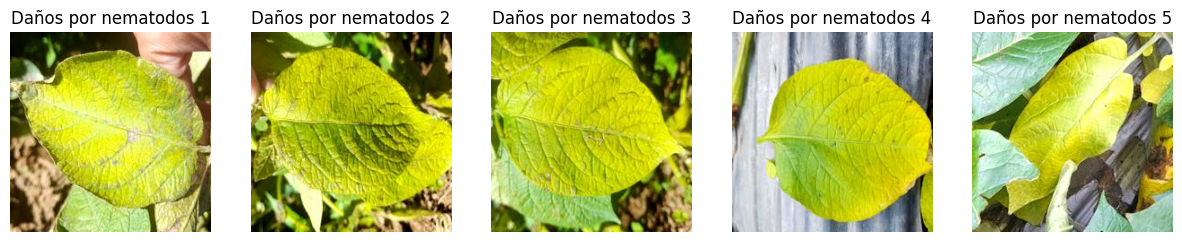

Mostrando imágenes de la categoría: Daños por plagas


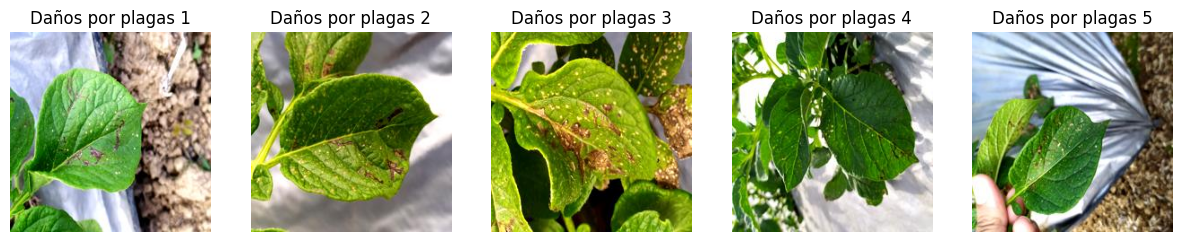

Mostrando imágenes de la categoría: Enfermedades bacterianas


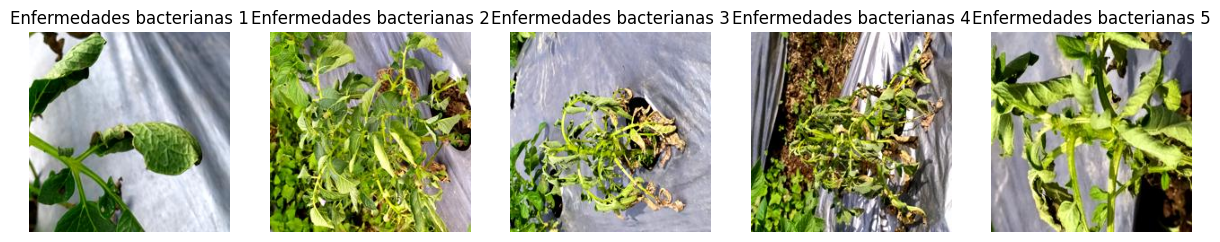

Mostrando imágenes de la categoría: Enfermedades fúngicas


Mostrando imágenes de la categoría: Enfermedades virales


Mostrando imágenes de la categoría: Salud


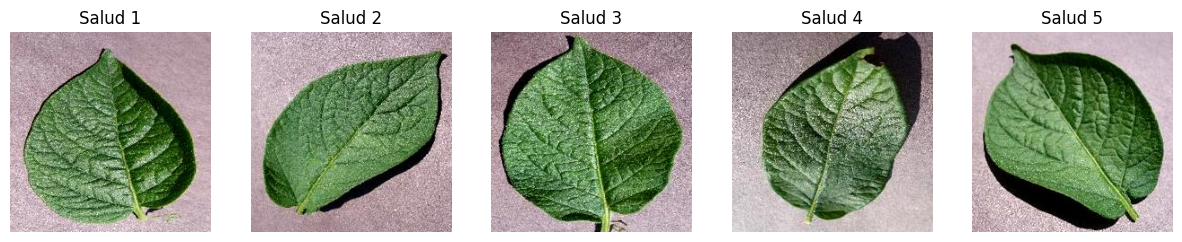

Mostrando imágenes de la categoría: Tizón tardío (Phytophthora)


Mostrando imágenes de la categoría: Tizón temprano


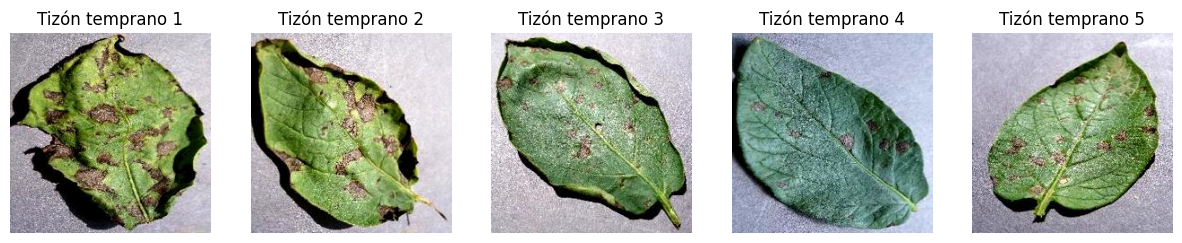

In [4]:
show_sample_images_pil(dataset, categories1)

#### Función para dividir la data en subconjuntos de entrenamiento, validación y prueba

In [5]:
def split_dataset(data_dir, output_dir, val_size=0.20, test_size=0.10, random_state=42):

    # Asegurarse de que val_size y test_size sean flotantes
    val_size = float(val_size)
    test_size = float(test_size)
    
    # Cargar el conjunto de datos completo
    full_dataset = ImageFolder(data_dir)
    
    # Obtener las etiquetas de clase
    labels = [label for _, label in full_dataset.samples]
    
    # Dividir primero en train+val y test
    train_val_indices, test_indices = train_test_split(
        range(len(full_dataset)),
        test_size=test_size,
        stratify=labels,
        random_state=random_state
    )
    
    # Dividir train+val en train y val
    train_indices, val_indices = train_test_split(
        train_val_indices,
        test_size=val_size/(1-test_size),
        stratify=[labels[i] for i in train_val_indices],
        random_state=random_state
    )
    
    # Crear subconjuntos usando los índices
    train_dataset = Subset(full_dataset, train_indices)
    val_dataset = Subset(full_dataset, val_indices)
    test_dataset = Subset(full_dataset, test_indices)
    
    # Crear directorios de salida
    for split in ['train', 'val', 'test']:
        split_dir = os.path.join(output_dir, split)
        os.makedirs(split_dir, exist_ok=True)
        # Crear subdirectorios para cada clase
        for class_name in full_dataset.classes:
            os.makedirs(os.path.join(split_dir, class_name), exist_ok=True)
    
    # Función auxiliar para copiar imágenes
    def copy_images(indices, split):
        for idx in indices:
            img_path, class_idx = full_dataset.samples[idx]
            class_name = full_dataset.classes[class_idx]
            dest_dir = os.path.join(output_dir, split, class_name)
            shutil.copy(img_path, os.path.join(dest_dir, os.path.basename(img_path)))
    
    # Copiar imágenes a los nuevos directorios
    copy_images(train_indices, 'train')
    copy_images(val_indices, 'val')
    copy_images(test_indices, 'test')
    
    print(f"Tamaño del conjunto de entrenamiento: {len(train_dataset)}")
    print(f"Tamaño del conjunto de validación: {len(val_dataset)}")
    print(f"Tamaño del conjunto de prueba: {len(test_dataset)}")
    
    return train_dataset, val_dataset, test_dataset


#### Divide un conjunto de datos de imágenes en subconjuntos de entrenamiento, validación y prueba.

- data_dir (str): Ruta al directorio que contiene las imágenes organizadas en subcarpetas por clase.
- val_size (float): Proporción del conjunto de datos a usar para validación (por defecto 0.20).
- test_size (float): Proporción del conjunto de datos a usar para prueba (por defecto 0.10).
- random_state (int): Semilla para reproducibilidad (por defecto 42).


In [6]:
output_directory = '../data/final_data'  
train_dataset, val_dataset, test_dataset = split_dataset(dataset, output_directory)

Tamaño del conjunto de entrenamiento: 7280
Tamaño del conjunto de validación: 2080
Tamaño del conjunto de prueba: 1040
